# Commercial Store Data

<h2>Import Libraries</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import re

<h2> Load the Data</h2>

In [3]:
storeData=pd.read_csv("data.csv", low_memory=False)

In [4]:
#to display  max values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#create dataframe 
df = pd.DataFrame(storeData)

## Inspect data

In [5]:
# show data
df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [245]:
""" 
    InvoiceNo:invoice no: of customer
    StockCode:unique identifier assigned to each product 
    Description:product name
    Quantity:quantity of product 
    InvoiceDate:date of purchase
    UnitPrice:price per unit item
    CustomerID:unique ID of customer
    Country:country of customer
    TotalValue:total amount spend"""
#column information
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [246]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27865 entries, 0 to 27864
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    27865 non-null  object 
 1   StockCode    27865 non-null  object 
 2   Description  27752 non-null  object 
 3   Quantity     27865 non-null  int64  
 4   InvoiceDate  27865 non-null  object 
 5   UnitPrice    27865 non-null  float64
 6   CustomerID   17928 non-null  float64
 7   Country      27865 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB


In [247]:
"""Count: The number of non-null entries.
Mean: The average value.
Standard Deviation (std): The spread of the data.
Min: The minimum value.
25%: The 25th percentile (first quartile).
50%: The 50th percentile (median).
75%: The 75th percentile (third quartile).
Max: The maximum value."""
# Descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,27865.000000,27865.000000,17928.000000
mean,7.307088,6.770915,15582.891789
std,67.768182,171.499338,1755.083386
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.450000,14205.000000
50%,2.000000,2.510000,15628.000000
75%,6.000000,4.250000,17218.000000
max,2880.000000,13541.330000,18269.000000


## Handle Missing Values

In [248]:
# Check for missing values
print(df.isnull().sum())


InvoiceNo         0
StockCode         0
Description     113
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     9937
Country           0
dtype: int64


In [249]:
#  Remove rows with missing values
df = df.dropna()
df = df.dropna(subset=['CustomerID'])


## Change  -ve values to +ve

In [250]:
df['Quantity'] = df['Quantity'].abs()
df['UnitPrice'] = df['UnitPrice'].abs()

## Remove Duplicates

In [251]:
# Check for duplicates
print(df.duplicated().sum())

407


In [252]:
# Remove duplicates
df = df.drop_duplicates()

## Convert Data Types

In [253]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int')
#remove nonnunbers from invoice number
def removeNonNumber(text):
    return re.sub(r'[^0-9]', '', text)
# Apply the function to the 'invoice_number' column
df['InvoiceNo'] = df['InvoiceNo'].apply(removeNonNumber)

##  Outliers

In [290]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
outliers.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.00
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,15.60
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-12-01 08:45:00,1.25,12583,France,30.00
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,12583,France,70.80
35,536370,22629,SPACEBOY LUNCH BOX,24,2010-12-01 08:45:00,1.95,12583,France,46.80
36,536370,22659,LUNCH BOX I LOVE LONDON,24,2010-12-01 08:45:00,1.95,12583,France,46.80
37,536370,22631,CIRCUS PARADE LUNCH BOX,24,2010-12-01 08:45:00,1.95,12583,France,46.80
39,536370,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-01 08:45:00,1.65,12583,France,39.60
40,536370,22900,SET 2 TEA TOWELS I LOVE LONDON,24,2010-12-01 08:45:00,2.95,12583,France,70.80


In [255]:
#removing
df= df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

## Store Cleaned Data

In [256]:
df.to_csv('cleanedStoreData.csv', index=False)

## cleaned data

In [257]:
cleanedStoreData=pd.read_csv("cleanedStoreData.csv", low_memory=False)
df1 = pd.DataFrame(cleanedStoreData)

In [262]:
# Add new column 'Total Value' which is Quantity * Unit Price
df1['TotalValue'] = df1['Quantity'] * df1['UnitPrice']


# "Store data"

In [263]:
df1.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,12.60


In [264]:
#column information
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalValue'],
      dtype='object')

In [265]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16508 entries, 0 to 27449
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    16508 non-null  object        
 1   StockCode    16508 non-null  object        
 2   Description  16508 non-null  object        
 3   Quantity     16508 non-null  int64         
 4   InvoiceDate  16508 non-null  datetime64[ns]
 5   UnitPrice    16508 non-null  float64       
 6   CustomerID   16508 non-null  int32         
 7   Country      16508 non-null  object        
 8   TotalValue   16508 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 1.2+ MB


In [266]:
# Descriptive statistics
df1.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalValue
count,16508.000000,16508.000000,16508.000000,16508.000000,16508.000000
mean,537445.184395,5.954689,3.239607,15598.087836,13.719028
std,624.418633,6.217899,5.571899,1755.721643,18.231033
min,536365.000000,1.000000,0.000000,12347.000000,0.000000
25%,536975.000000,1.000000,1.250000,14256.000000,3.750000
50%,537382.000000,3.000000,2.100000,15694.000000,9.900000
75%,538009.000000,9.000000,3.750000,17218.000000,17.400000
max,538565.000000,28.000000,295.000000,18269.000000,527.700000


In [270]:
# Total rows and columns
df1.shape

(16508, 9)

In [271]:
#to find customer who has spend maximum money in single  item purchase
df1.loc[df1["TotalValue"].argmax()][["CustomerID","Description","TotalValue"]]

CustomerID                           18102
Description    VINTAGE POST OFFICE CABINET
TotalValue                           527.7
Name: 10054, dtype: object

In [272]:
#to find customer who has spend mainimum money in single  item purchase
df1.loc[df1["TotalValue"].argmin()][["InvoiceNo","CustomerID","Description","TotalValue"]]

InvoiceNo                            537197
CustomerID                            12647
Description    ROUND CAKE TIN VINTAGE GREEN
TotalValue                              0.0
Name: 6415, dtype: object

# Product List

In [273]:
#total number of uniqe products 
print(len(df1.Description.unique()))
#product List
print("\n".join(map(str, df1.Description.unique())))

2114
WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPACEBOY LUNCH BOX 
LUNCH BOX I LOVE LONDON
CIRCUS PARAD

# Countries List

In [274]:
#total number of uniqe countries 
print(len(df1.Country.unique()))
#Country List
print("\n".join(df1.Country.unique()))

18
United Kingdom
France
Australia
Netherlands
Germany
Norway
EIRE
Switzerland
Poland
Portugal
Italy
Belgium
Lithuania
Japan
Iceland
Channel Islands
Denmark
Spain


### Total money spend by customers(country wise)

In [276]:
salesByCountry = df1.groupby('Country')['TotalValue'].sum().sort_values(ascending=False)

# to dataframe
salesByCountrydf = salesByCountry.reset_index()
salesByCountrydf.columns = ['Country', 'TotalExpense']

# Print the DataFrame
salesByCountrydf

,Country,TotalExpense
0,United Kingdom,196041.78
1,Germany,7107.78
2,France,6859.31
3,EIRE,5114.67
4,Norway,2667.74
5,Portugal,1976.47
6,Lithuania,1266.86
7,Japan,1059.47
8,Spain,950.01
9,Denmark,917.30


### total quantity of products sold overall

In [277]:
totalProductsSold = df1.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(100)
# show data
totalProductsSold


Description
JAM MAKING SET PRINTED                 744
PACK OF 72 RETROSPOT CAKE CASES        682
WHITE HANGING HEART T-LIGHT HOLDER     665
HAND WARMER BIRD DESIGN                639
HAND WARMER BABUSHKA DESIGN            542
PAPER CHAIN KIT 50'S CHRISTMAS         517
ASSORTED COLOUR BIRD ORNAMENT          517
HAND WARMER OWL DESIGN                 513
60 CAKE CASES VINTAGE CHRISTMAS        512
HOMEMADE JAM SCENTED CANDLES           504
HAND WARMER UNION JACK                 493
RED WOOLLY HOTTIE WHITE HEART.         487
HAND WARMER RED RETROSPOT              472
HEART OF WICKER SMALL                  449
HAND WARMER SCOTTY DOG DESIGN          442
PAPER CHAIN KIT VINTAGE CHRISTMAS      421
REGENCY CAKESTAND 3 TIER               405
SMALL POPCORN HOLDER                   403
HOT WATER BOTTLE BABUSHKA              388
SET OF 20 VINTAGE CHRISTMAS NAPKINS    387
CHOCOLATE HOT WATER BOTTLE             377
60 TEATIME FAIRY CAKE CASES            367
ANTIQUE SILVER TEA GLASS ETCHED        356

###  total amount spend  by customer over all

In [278]:
CustomerTotalSpending = df1.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(100)
# show data
CustomerTotalSpending

CustomerID
17850    5391.21
14911    5107.17
12748    2736.31
12433    2667.74
17340    2093.63
12567    1934.82
16873    1904.88
12472    1657.90
12471    1623.81
13013    1487.54
13081    1479.26
17841    1418.61
13089    1375.90
14667    1355.87
13174    1328.74
15332    1266.86
15061    1257.72
15502    1224.50
17827    1215.04
13488    1189.44
15311    1183.46
12766    1149.29
14800    1108.91
15498    1107.96
13767    1083.90
12682    1075.29
12683    1063.08
16244    1056.63
14031    1056.62
18055    1000.48
13418     992.34
12647     968.80
14733     956.10
17017     945.48
14505     937.50
12429     917.30
17511     906.22
15808     900.85
17722     886.74
15856     866.92
15998     855.83
13448     854.74
15570     851.19
16265     840.81
12731     838.50
17809     826.50
14796     819.57
15555     818.78
12681     808.52
12583     791.66
17581     786.78
15044     786.35
17838     778.06
14290     777.56
12540     775.29
13370     774.50
17865     756.45
18102     755.17
133

## Customers from each country

In [279]:
customerCounts = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
customerCounts

Country
United Kingdom     608
Germany             16
France              10
Portugal             5
Spain                2
Italy                2
Australia            2
EIRE                 2
Japan                2
Iceland              1
Belgium              1
Lithuania            1
Netherlands          1
Norway               1
Poland               1
Denmark              1
Channel Islands      1
Switzerland          1
Name: CustomerID, dtype: int64

### daily sales amount

In [281]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
dailySales = df1.groupby(df1['InvoiceDate'].dt.to_period('D'))['TotalValue'].sum()
dailySalesdf = dailySales.reset_index()
dailySalesdf.columns = ['Date', 'TotalExpense']
# Extracting the day from the date for ploting graph
dailySalesdf['Day'] = dailySalesdf['Date'].dt.day
dailySalesdf


,Date,TotalExpense,Day
0,2010-12-01,25038.50,1
1,2010-12-02,27959.20,2
2,2010-12-03,15429.71,3
3,2010-12-05,25515.22,5
4,2010-12-06,22305.64,6
5,2010-12-07,18329.74,7
6,2010-12-08,30058.96,8
7,2010-12-09,26253.36,9
8,2010-12-10,19555.31,10
9,2010-12-12,11984.50,12


# Visualizations

## Graph to show Total Expense by Country in Log Scale

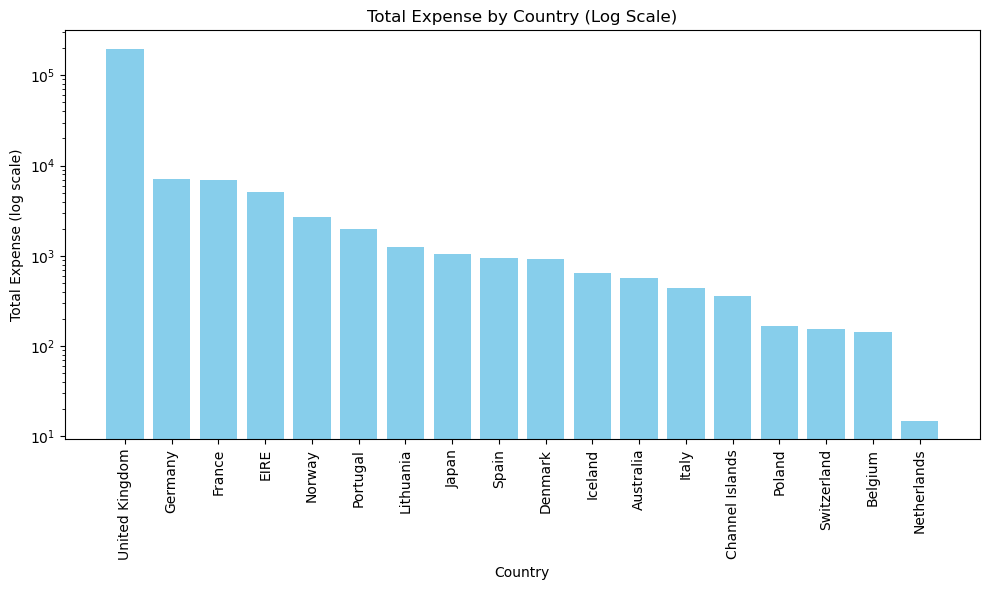

In [282]:
plt.figure(figsize=(10, 6))
plt.bar(salesByCountrydf['Country'], salesByCountrydf['TotalExpense'], color='skyblue')
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Total Expense (log scale)')
plt.title('Total Expense by Country (Log Scale)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Graph to show daily  Expense

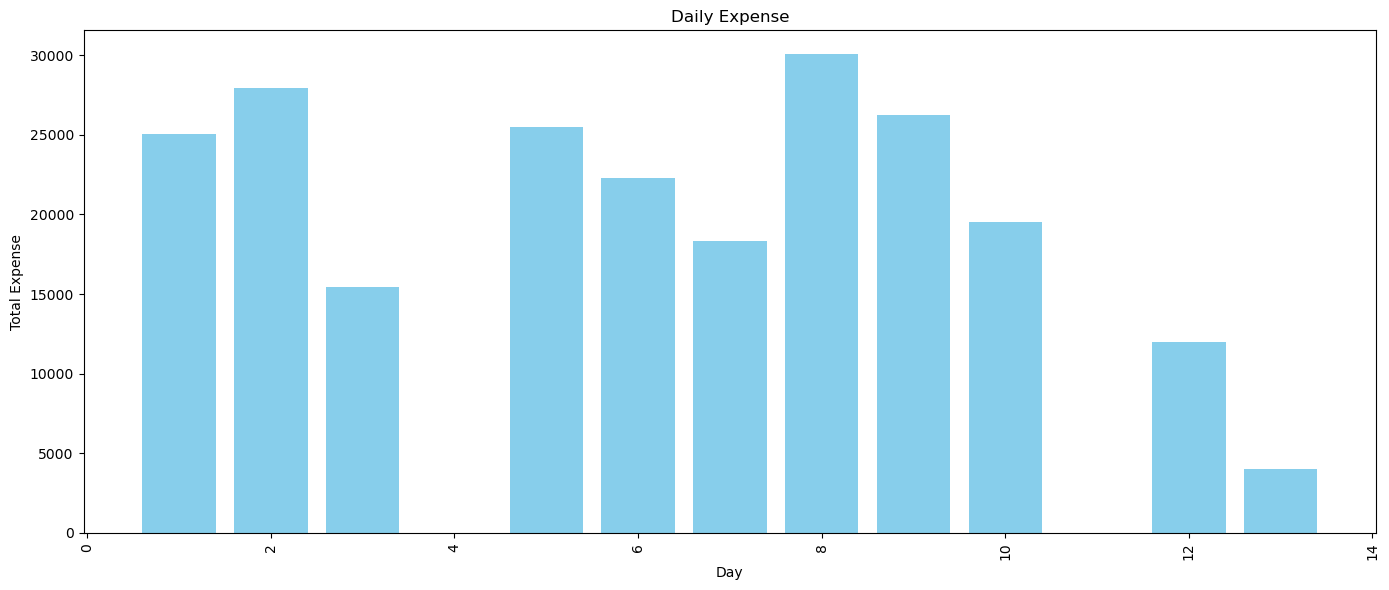

In [283]:
plt.figure(figsize=(14, 6))
plt.bar(dailySalesdf['Day'], dailySalesdf['TotalExpense'], color='skyblue')
plt.xlabel('Day')
plt.ylabel('Total Expense')
plt.title('Daily Expense')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Graph to show customer total spending

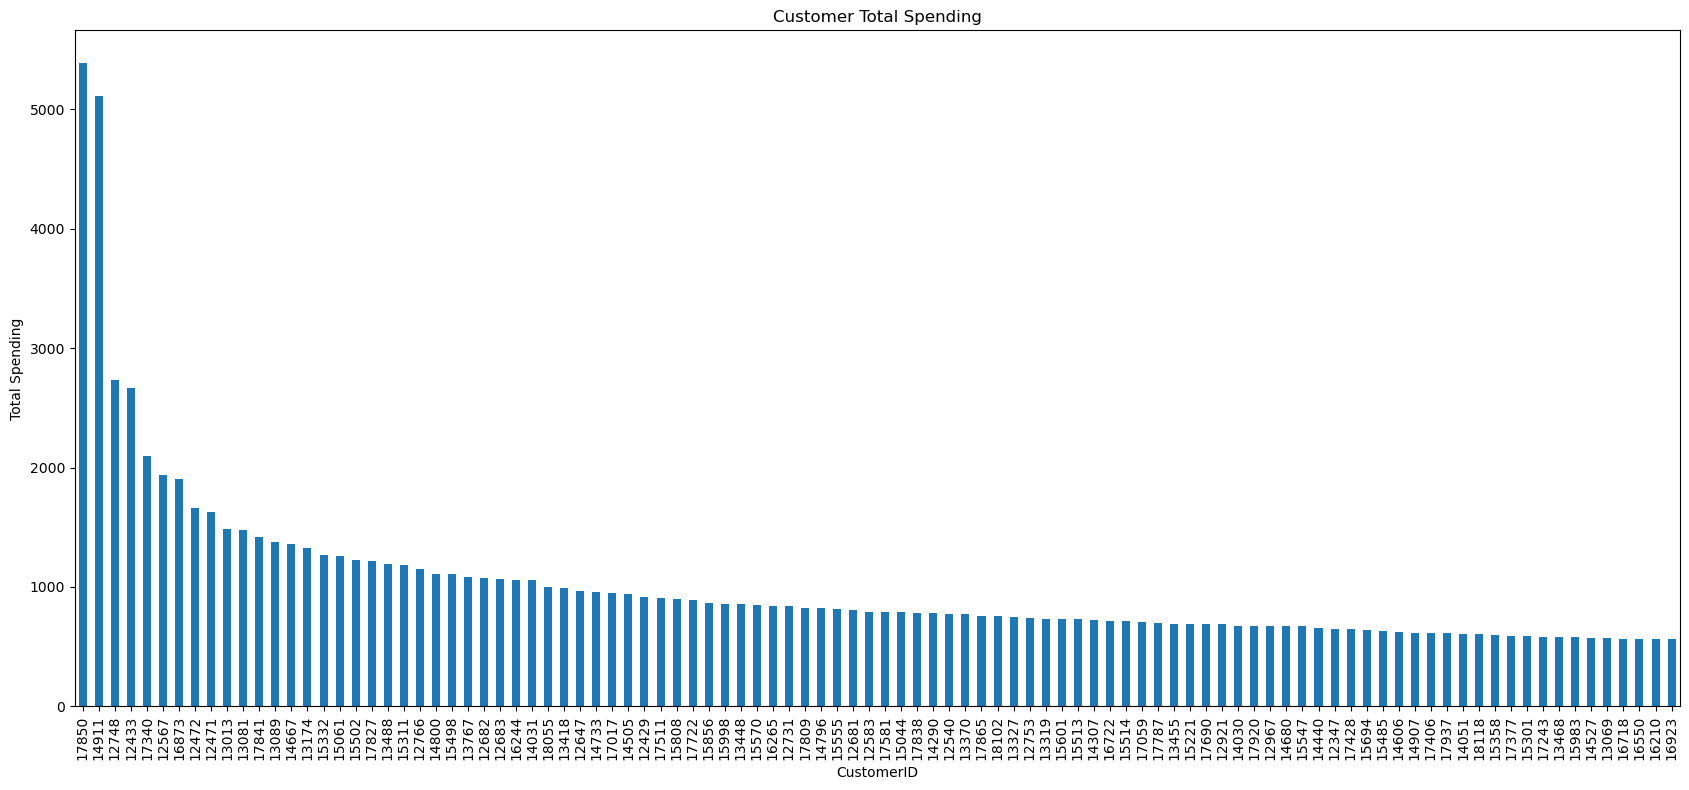

In [284]:
plt.figure(figsize=(17,8))
CustomerTotalSpending.plot(kind='bar')
plt.title('Customer Total Spending')
plt.xlabel('CustomerID')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()

## Graph to show customer total quantity of product sold

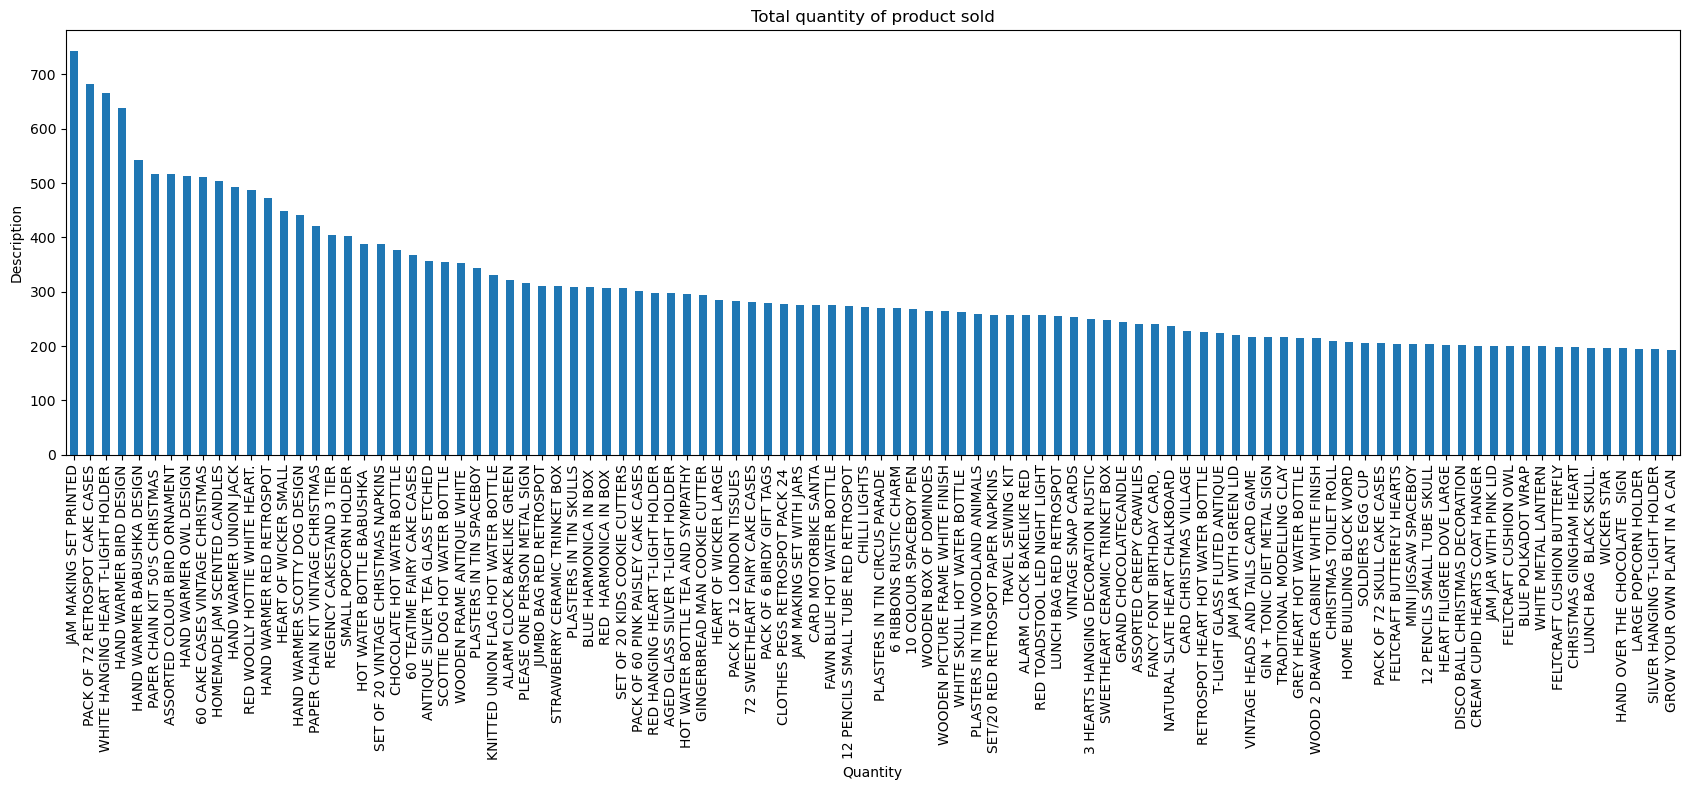

In [285]:
plt.figure(figsize=(17,8))
totalProductsSold.plot(kind='bar')
plt.title('Total quantity of product sold')
plt.xlabel('Quantity')
plt.ylabel('Description')
plt.tight_layout()
plt.show()

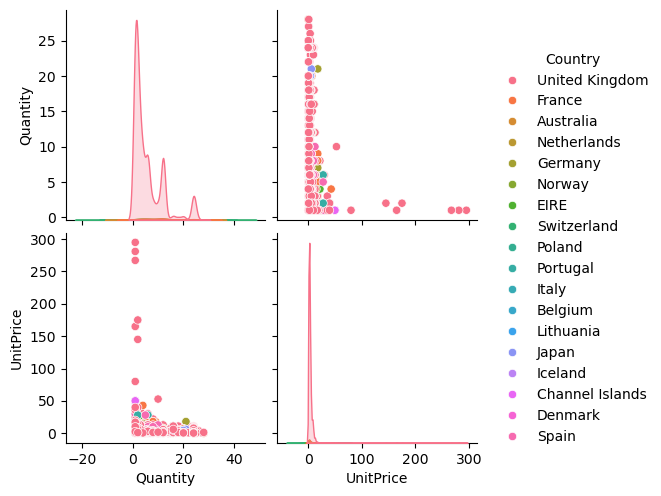

In [286]:
# pairwise relationships between quantity and unit price with respect to country
sns.pairplot(df, vars=['Quantity', 'UnitPrice'], hue='Country')

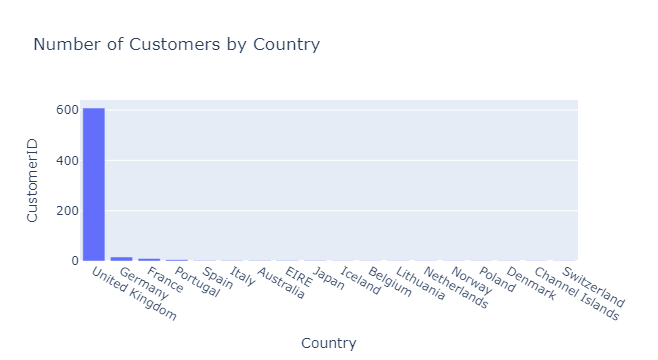

In [287]:
customerCounts = customerCounts.reset_index()
fig = px.bar(customerCounts, x='Country', y='CustomerID', title='Number of Customers by Country')
fig

<Axes: xlabel='Quantity', ylabel='Count'>

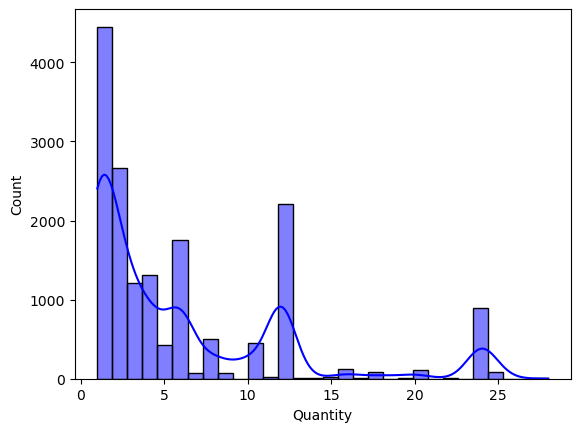

In [288]:
#  distribution of a quantity  variable
sns.histplot(df['Quantity'], bins=30, kde=True, color='blue')

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

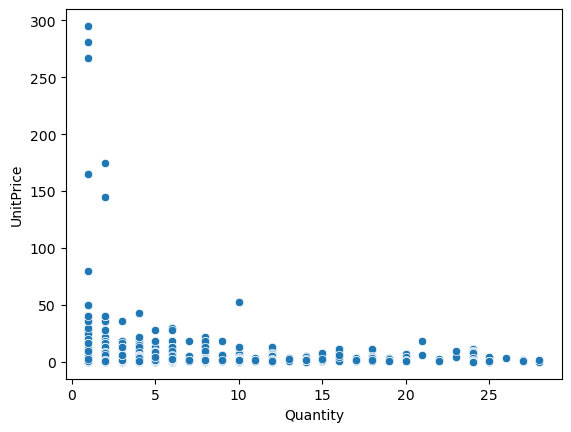

In [289]:
# relationships between quantity and unitprice variables
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)